In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import get_train_results, add_scatterplot, add_history_plot
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

model_name = 'cnn'

## Load data

In [2]:
y_test_k001, predictions_k001, history_k001 = get_train_results(model_name, "k0.01")
y_test_k01, predictions_k01, history_k01 = get_train_results(model_name, "k0.1")

## Plot

k=0.01: pearson coefs= 0.9999913033388783
k=0.1: pearson coefs= 0.9999999074969352


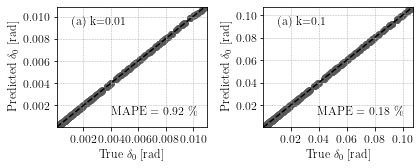

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))

print('k=0.01: pearson coefs=', stats.pearsonr(y_test_k001, predictions_k001)[0])
add_scatterplot(axs, 0, y_test_k001, predictions_k001, str_label='(a) k=0.01', nticks=6)

print('k=0.1: pearson coefs=', stats.pearsonr(y_test_k01, predictions_k01)[0])
add_scatterplot(axs, 1, y_test_k01, predictions_k01, str_label='(a) k=0.1', nticks=6)

plt.tight_layout()
plt.savefig('output/'+model_name+'/sqw_scatter.pdf', format='pdf')
plt.show()

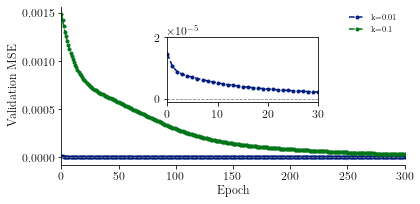

In [3]:
plt.style.use('seaborn-dark-palette') 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(history_k001['loss'], label='k=0.01', marker='.', linestyle='--', color=colors[0])
ax.plot(history_k01['loss'], label='k=0.1', marker='.', linestyle='--',  color=colors[1])

ax2 = fig.add_axes([0.4, 0.5, 0.35, 0.3])
ax2.plot(history_k001['loss'], label='k=5.0', marker='.', linestyle='dashed', color=colors[0])
ax2.set_xlim(-0.05, 30)
ax2.set_ylim(-1e-6, 0.00002)
ax2.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

ax.set_ylabel('Validation MSE')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right', frameon=False)
ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.set_xlim(-0.05, 300)

plt.tight_layout()
plt.grid(False)
plt.savefig('output/'+model_name+'/sqw_history.pdf', format='pdf')
plt.show()